In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [2]:
df = pd.read_csv("Corona_NLP_train.csv")

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_tweets=df[['OriginalTweet','Sentiment']]

In [5]:
df_tweets.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [26]:
100 * df_tweets['Sentiment'].value_counts()/len(df_tweets)

Positive              27.752266
Negative              24.095537
Neutral               18.740433
Extremely Positive    16.094468
Extremely Negative    13.317297
Name: Sentiment, dtype: float64

In [7]:
df_tweets.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [8]:
# Checking if there are any "blank" tweets. If there are, then we'll remove such tweets.
blanks = []
for i, tweet, lb in df_tweets.itertuples():
    if type(tweet) == str:
        if tweet.isspace():
            blanks.append(i)

In [9]:
blanks # no blank tweets

[]

# EDA

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

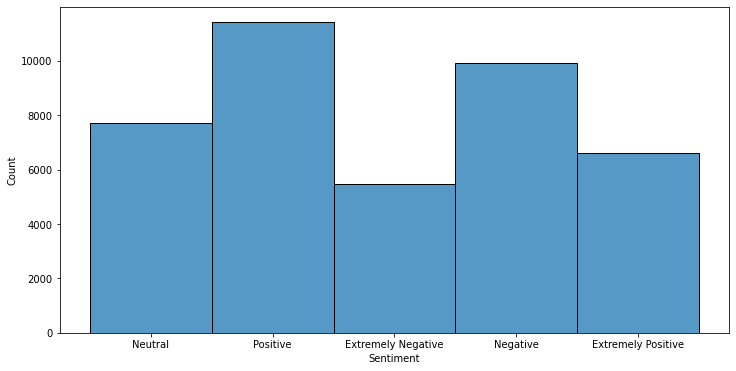

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_tweets,x='Sentiment')

#### Inference:
We can see that most of the samples (tweets) have "positive" sentiment. Next, are the tweets having "Negative" sentiments, after that comes tweets with "Neutral" sentiments. Then, we can see the "extreme cases" lead by "Extremely Positive" sentiments and followed by "Extremely Negative" sentiments.

#### Let's try to analyze these tweets with respect to their sentiment polarity scores (positve score, negative score, neutral score and compound score)

In [69]:
df2 = df_tweets.copy()

In [70]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [71]:
sia = SentimentIntensityAnalyzer()

In [72]:
sia.polarity_scores(df2['OriginalTweet'][3])

{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.8731}

In [73]:
df2['pos_score'] = df2["OriginalTweet"].apply(lambda x: sia.polarity_scores(x)['pos'])
df2['neg_score'] = df2["OriginalTweet"].apply(lambda x: sia.polarity_scores(x)['neg'])
df2['neu_score'] = df2["OriginalTweet"].apply(lambda x: sia.polarity_scores(x)['neu'])
df2['comp_score'] = df2["OriginalTweet"].apply(lambda x: sia.polarity_scores(x)['compound'])

In [74]:
df2.head()

,OriginalTweet,Sentiment,pos_score,neg_score,neu_score,comp_score
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.000,0.000,1.000,0.0000
1,advice Talk to your neighbours family to excha...,Positive,0.077,0.000,0.923,0.2500
2,Coronavirus Australia: Woolworths to give elde...,Positive,0.188,0.000,0.812,0.4588
3,My food stock is not the only one which is emp...,Positive,0.223,0.000,0.777,0.8731
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0.208,0.079,0.713,0.7161


<AxesSubplot:xlabel='comp_score', ylabel='Count'>

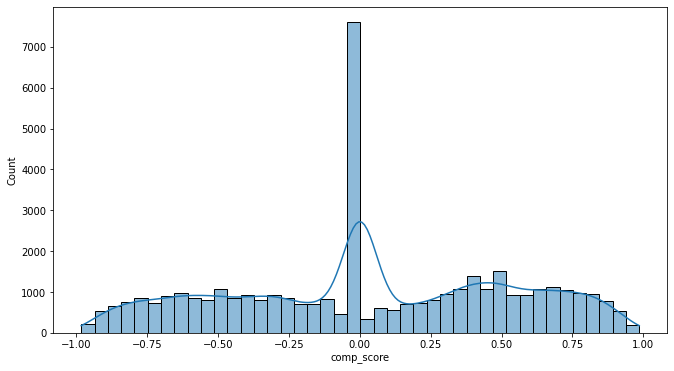

In [75]:
plt.figure(figsize=(11,6))
sns.histplot(data=df2,x='comp_score',kde=True)

#### Inference:
We can notice almost a perfect normal distribution with wide tails. The plot is almost symmetric, with a slightly highert height around the positive region which could be due to the higher number of positive and extremely positive number of tweets.

<AxesSubplot:xlabel='pos_score', ylabel='Count'>

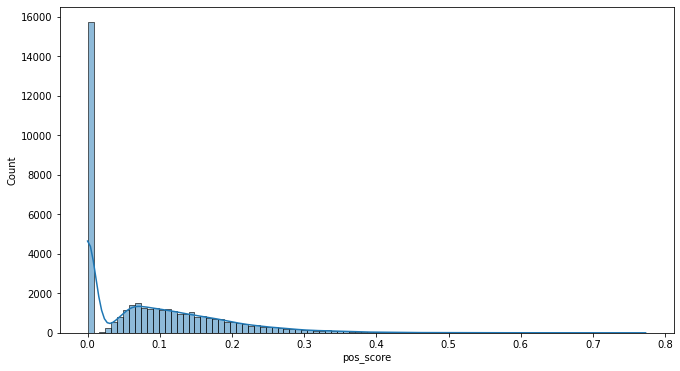

In [78]:
plt.figure(figsize=(11,6))
sns.histplot(data=df2,x='pos_score',kde=True)

#### Inference:
The positive score of tweets seems to distributed in a highly right skewed normal distribution manner, with a slight peak occuring around 0.06 - 0.08. However, we can see that a very high number of tweets (around 16000) have a pos_score of 0 indicating that they are either highly negative, negative or neutral. All the non-positive number of tweets are summed in that one single bar.

<AxesSubplot:xlabel='neg_score', ylabel='Count'>

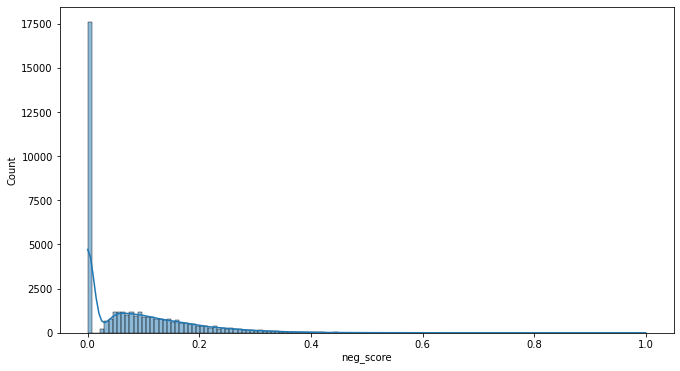

In [77]:
plt.figure(figsize=(11,6))
sns.histplot(data=df2,x='neg_score',kde=True)

#### Inference:
The negative score of tweets seems to distributed in a highly right skewed normal distribution manner, with a slight peak occuring around 0.08 - 0.12. However, we can see that a very high number of tweets (around 17500) have a neg_score of 0 indicating that they are either highly positive, positive or neutral. All the non-negative number of tweets are summed in that one single bar.

<AxesSubplot:xlabel='neu_score', ylabel='Count'>

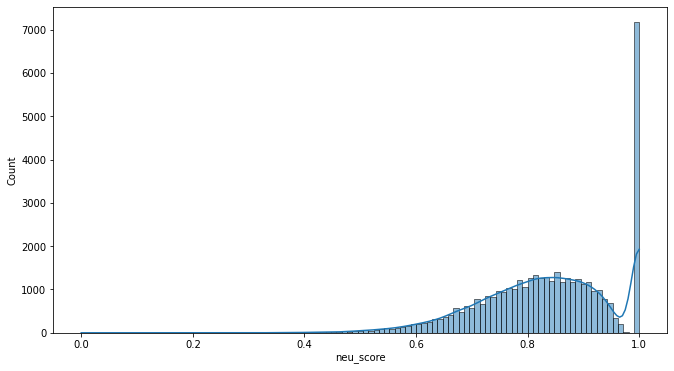

In [79]:
plt.figure(figsize=(11,6))
sns.histplot(data=df2,x='neu_score',kde=True)

#### Inference:
The distribution is of the form highly left skewed normal distribution. We can see "humped peak" around a neu_score of 0.85. High number of "absolutely neutral" tweets are present (around 7000), indicated by a single bar.

The above 4 graphs show that except comp_score all the scores have a high skewed distribution followed/preceeded by a single long bar (indicating all those scores which are not present in that particular score category)

#### Now, Let's focus on the comp_score of each sentiment

#### Neutral

<AxesSubplot:xlabel='comp_score', ylabel='Count'>

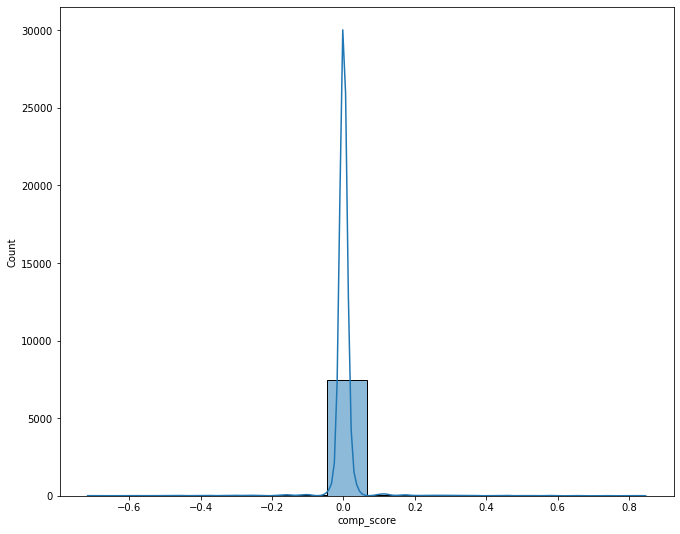

In [92]:
plt.figure(figsize=(11,9))
sns.histplot(data=df2[df2['Sentiment']=='Neutral'],x='comp_score',kde=True)

#### Inference:
For "Neutral" tweets, we can see a peak around comp_score of 0, with a symmetric tails. The distribution is normal and symmetric with long tails. However, the tail on the positve side is slightly longer than the one on the left (due to higher number of positve tweets)

#### Positive

<AxesSubplot:xlabel='comp_score', ylabel='Count'>

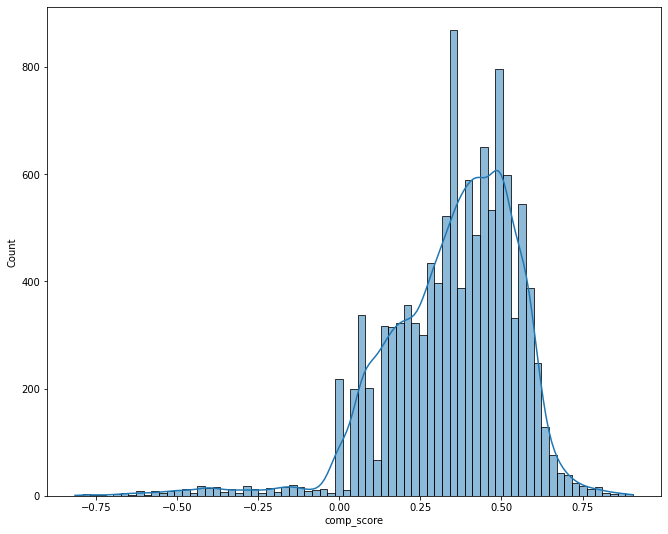

In [80]:
plt.figure(figsize=(11,9))
sns.histplot(data=df2[df2['Sentiment']=='Positive'],x='comp_score',kde=True)

#### Inference:
For positve tweets, we can see a huge peak in comp_score from around 0.5 and the peak diminishes around 0.75. This could be due to the fact that tweets having comp_score of more than 0.5 are classified as "Highly Positive" and not just "Positive". However, we could see quite a few tweets which have comp_score of more than 0.75 being classified as only "Positive" and not "Highly Positive", this could be due to the fact that those tweets might be having a very high neu_score or neg_score.

#### Extremely Positive

<AxesSubplot:xlabel='comp_score', ylabel='Count'>

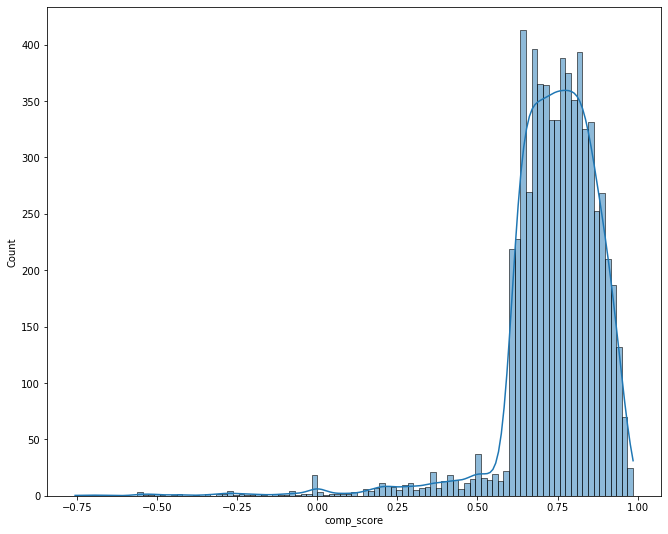

In [84]:
plt.figure(figsize=(11,9))
sns.histplot(data=df2[df2['Sentiment']=='Extremely Positive'],x='comp_score',kde=True)

In [95]:
df2[(df2['Sentiment']=='Extremely Positive') & (df2['comp_score'] < -0.75)]

,OriginalTweet,Sentiment,pos_score,neg_score,neu_score,comp_score
3738,Well...\r\r\n The free testing won't work for ...,Extremely Positive,0.112,0.279,0.609,-0.7561


#### Inference:
In case of "Highly Positive" tweets, we can see a huge peak jump around 0.75 which diminshes at 1 (because 1 is the max score). This peak takes place right off from the point where the peak of "Positive" tweets end, proving our assumption (comp_score greater than 0.75 being classified as "Highly Positive" tweets) to be correct. We can even spot a few outliers having the comp_score of around -0.75, which could be due to the fact those tweets having high neg_score and neu_score than the pos_score. It could also be the case such tweets are misclassified (possibly due to some error in the initial classifying system)

#### Negative

<AxesSubplot:xlabel='comp_score', ylabel='Count'>

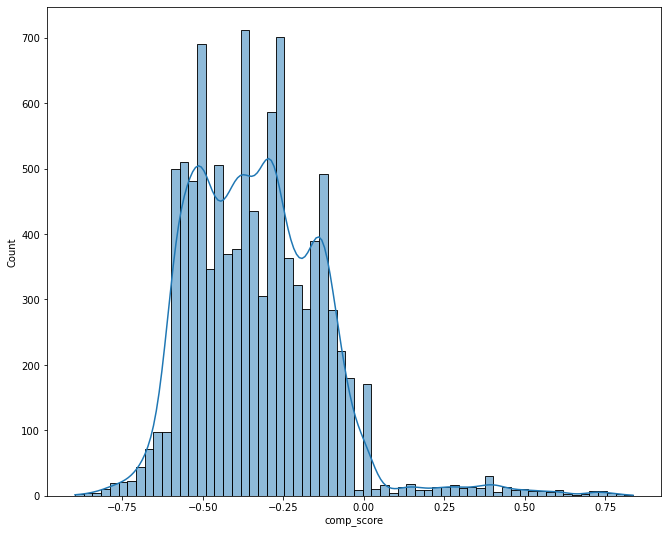

In [81]:
plt.figure(figsize=(11,9))
sns.histplot(data=df2[df2['Sentiment']=='Negative'],x='comp_score',kde=True)

#### Inference:
We can see that the peak of this graph is wobbly and is on the negative side. There is no "one peak", however, we can say that the region of peak starts from around -0.25 and ends a little bit before -0.75. This could be due to the fact that the statements having comp_score lower than -0.75 are classified as "Highly Negative" instead of just "Negative"

#### Extremely Negative

<AxesSubplot:xlabel='comp_score', ylabel='Count'>

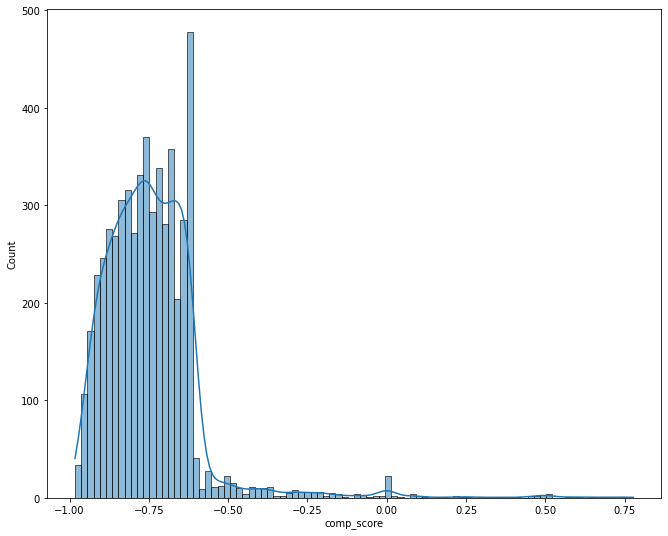

In [83]:
plt.figure(figsize=(11,9))
sns.histplot(data=df2[df2['Sentiment']=='Extremely Negative'],x='comp_score',kde=True)

In [96]:
df2[(df2['Sentiment']=='Extremely Negative') & (df2['comp_score'] > 0.75)]

,OriginalTweet,Sentiment,pos_score,neg_score,neu_score,comp_score
5485,"Stay home if you can! Please, this COVID-19 is...",Extremely Negative,0.200,0.032,0.768,0.7763
19850,"Gas prices are falling across the US, but cons...",Extremely Negative,0.267,0.159,0.574,0.7523


#### Inference:
In case of "Highly Negative" tweets, we can see a huge peak jump around -0.75 which diminshes at 1 (because -1 is the min score). This peak takes place right off from the point where the peak of "Negative" tweets end, proving our assumption (comp_score less than -0.75 being classified as "Highly Negative" tweets) to be correct. We can even spot a few outliers having the comp_score of around +0.75, which could be due to the fact those tweets having high pos_score and neu_score than the pos_score. It could also be the case such tweets are misclassified (possibly due to some error in the initial classifying system)

#### Note:
We can notice that the graphs of "Highly Positive" and "Highly Negative" graphs are almost mirror image of each other, indicating an almost symmetric distribution around the "Extreme" values. This was also noticed earlier when we plotted "neu_score" 

## Implementing ML algos

#### Splitting the data into train and test set

In [11]:
X = df_tweets['OriginalTweet']
y = df_tweets['Sentiment']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Creating pipelines (including Tfidf vectorization and then using classification algorithm)

In [14]:
from sklearn.pipeline import Pipeline

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [42]:
p1 = Pipeline([('tfidf',TfidfVectorizer()), ('lr',LogisticRegression(max_iter=1000000,solver='saga'))]) # Logistic regression pipeline
p2 =  Pipeline([('tfidf',TfidfVectorizer()), ('lsvc',LinearSVC(random_state=42))]) # Linear SVC regression pipeline
p3 = Pipeline([('tfidf',TfidfVectorizer()), ('svc',SVC(random_state=42))]) # SVC regression pipeline
p4 =  Pipeline([('tfidf',TfidfVectorizer()), ('mnb',MultinomialNB())]) # Multinomial Naive bayes regression pipeline

#### 1) Logistic Regression

In [39]:
p1.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(max_iter=1000000, solver='saga'))])

In [40]:
lr_pred = p1.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.60      0.48      0.53      1753
Extremely Positive       0.66      0.54      0.60      2190
          Negative       0.49      0.50      0.50      3300
           Neutral       0.62      0.63      0.63      2518
          Positive       0.51      0.60      0.55      3821

          accuracy                           0.56     13582
         macro avg       0.58      0.55      0.56     13582
      weighted avg       0.56      0.56      0.56     13582

[[ 834   23  715   70  111]
 [  16 1186   74   59  855]
 [ 414   80 1661  431  714]
 [  33   30  349 1594  512]
 [  87  467  575  401 2291]]


#### 2) Linear SVC

In [24]:
p2.fit(X_train,y_train)
lsvc_pred = p2.predict(X_test)
print(classification_report(y_test,lsvc_pred))
print(confusion_matrix(y_test,lsvc_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.58      0.63      0.60      1753
Extremely Positive       0.60      0.67      0.63      2190
          Negative       0.49      0.44      0.46      3300
           Neutral       0.62      0.64      0.63      2518
          Positive       0.51      0.49      0.50      3821

          accuracy                           0.55     13582
         macro avg       0.56      0.57      0.57     13582
      weighted avg       0.55      0.55      0.55     13582

[[1096   24  507   46   80]
 [  16 1458   56   52  608]
 [ 645  111 1464  428  652]
 [  44   43  359 1618  454]
 [  86  788  627  452 1868]]


#### 3) SVC

In [43]:
# SVC not good for this case
p3.fit(X_train,y_train)
svc_pred = p3.predict(X_test)
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.70      0.44      0.54      1753
Extremely Positive       0.76      0.49      0.60      2190
          Negative       0.51      0.56      0.54      3300
           Neutral       0.66      0.61      0.63      2518
          Positive       0.51      0.68      0.58      3821

          accuracy                           0.58     13582
         macro avg       0.63      0.56      0.58     13582
      weighted avg       0.60      0.58      0.58     13582

[[ 763   10  786   52  142]
 [   8 1077   72   54  979]
 [ 253   43 1862  354  788]
 [  14   15  363 1535  591]
 [  55  271  574  330 2591]]


#### 4) Multinomial NB

In [28]:
p4.fit(X_train,y_train)
mnb_pred = p4.predict(X_test)
print(classification_report(y_test,mnb_pred))
print(confusion_matrix(y_test,mnb_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.87      0.01      0.01      1753
Extremely Positive       0.89      0.01      0.02      2190
          Negative       0.40      0.34      0.37      3300
           Neutral       0.85      0.05      0.09      2518
          Positive       0.33      0.93      0.49      3821

          accuracy                           0.35     13582
         macro avg       0.67      0.27      0.20     13582
      weighted avg       0.60      0.35      0.25     13582

[[  13    0 1028    1  711]
 [   0   25   36    1 2128]
 [   2    0 1121   14 2163]
 [   0    1  346  116 2055]
 [   0    2  279    4 3536]]


#### 5) Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
p5 = Pipeline([('tfidf',TfidfVectorizer()), ('rf',RandomForestClassifier(n_estimators=100,random_state=42))])

In [31]:
p5.fit(X_train,y_train)
rf_pred = p5.predict(X_test)
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.67      0.26      0.37      1753
Extremely Positive       0.68      0.30      0.41      2190
          Negative       0.44      0.44      0.44      3300
           Neutral       0.50      0.64      0.56      2518
          Positive       0.41      0.58      0.48      3821

          accuracy                           0.47     13582
         macro avg       0.54      0.44      0.45     13582
      weighted avg       0.51      0.47      0.46     13582

[[ 455   16  774  143  365]
 [  12  652  141  163 1222]
 [ 155   65 1457  617 1006]
 [  13   18  291 1621  575]
 [  42  209  651  707 2212]]


#### 6) XGBOOST

In [44]:
from xgboost import XGBClassifier

In [45]:
p6 = Pipeline([('tfidf',TfidfVectorizer()), ("xgb",XGBClassifier(random_state=42,booster='dart'))])

In [46]:
p6.fit(X_train,y_train)
xgb_pred = p6.predict(X_test)
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                    precision    recall  f1-score   support

Extremely Negative       0.61      0.47      0.53      1753
Extremely Positive       0.66      0.48      0.56      2190
          Negative       0.52      0.44      0.47      3300
           Neutral       0.54      0.75      0.63      2518
          Positive       0.49      0.56      0.52      3821

          accuracy                           0.54     13582
         macro avg       0.57      0.54      0.54     13582
      weighted avg       0.55      0.54      0.54     13582

[[ 821   36  569  155  172]
 [  15 1053   81  106  935]
 [ 370   99 1449  654  728]
 [  32   21  180 1892  393]
 [ 102  378  529  666 2146]]


#### 7) XGBRFBOOST

In [47]:
from xgboost import XGBRFClassifier

In [49]:
p7 = Pipeline([('tfidf',TfidfVectorizer()), ("xgbrf",XGBRFClassifier(random_state=42,booster='dart'))])
p7.fit(X_train,y_train)
xgbrf_pred = p7.predict(X_test)
print(classification_report(y_test,xgbrf_pred))
print(confusion_matrix(y_test,xgbrf_pred))

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                    precision    recall  f1-score   support

Extremely Negative       0.52      0.32      0.40      1753
Extremely Positive       0.53      0.33      0.40      2190
          Negative       0.45      0.22      0.30      3300
           Neutral       0.42      0.45      0.44      2518
          Positive       0.33      0.58      0.42      3821

          accuracy                           0.40     13582
         macro avg       0.45      0.38      0.39     13582
      weighted avg       0.43      0.40      0.39     13582

[[ 565   43  350  154  641]
 [  46  718   81  179 1166]
 [ 338  123  732  568 1539]
 [  33   25   80 1141 1239]
 [ 109  452  377  669 2214]]


#### 8) Catboost

In [50]:
from catboost import CatBoostClassifier

In [53]:
tfidf = TfidfVectorizer()

In [54]:
X_train_vect = tfidf.fit_transform(X_train)
X_test_vect = tfidf.transform(X_test)

In [58]:
p8 = Pipeline([('tfidf',TfidfVectorizer()), ("cb",CatBoostClassifier(random_state=42))])
p8.fit(X_train,y_train)
cb_pred = p8.predict(X_test)
print(classification_report(y_test,cb_pred))
print(confusion_matrix(y_test,cb_pred))

Learning rate set to 0.093711
0:	learn: 1.5874382	total: 16.6s	remaining: 4h 36m 18s
1:	learn: 1.5683432	total: 21.2s	remaining: 2h 56m 12s
2:	learn: 1.5508502	total: 22.7s	remaining: 2h 5m 32s
3:	learn: 1.5358196	total: 24.2s	remaining: 1h 40m 27s
4:	learn: 1.5228087	total: 25.6s	remaining: 1h 25m 1s
5:	learn: 1.5121974	total: 27s	remaining: 1h 14m 37s
6:	learn: 1.5018813	total: 28.4s	remaining: 1h 7m 5s
7:	learn: 1.4900895	total: 29.7s	remaining: 1h 1m 25s
8:	learn: 1.4819609	total: 31.1s	remaining: 57m 1s
9:	learn: 1.4742165	total: 32.4s	remaining: 53m 31s
10:	learn: 1.4659796	total: 33.9s	remaining: 50m 45s
11:	learn: 1.4594622	total: 35.2s	remaining: 48m 19s
12:	learn: 1.4534198	total: 36.6s	remaining: 46m 18s
13:	learn: 1.4476310	total: 38s	remaining: 44m 34s
14:	learn: 1.4429218	total: 39.6s	remaining: 43m 18s
15:	learn: 1.4375995	total: 41s	remaining: 42m 3s
16:	learn: 1.4333447	total: 42.4s	remaining: 40m 52s
17:	learn: 1.4287142	total: 43.8s	remaining: 39m 50s
18:	learn: 1.42

### Catboost is giving us the best accuracy... let's try it on the actual test set

#### Note: We won't be doing EDA on this actual test data as in practical scenario it is not possible to do any EDA on the incoming test data 

In [59]:
df_test = pd.read_csv("Corona_NLP_test.csv")

In [60]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [66]:
100 * df_test['Sentiment'].value_counts()/len(df_test)

Negative              27.409163
Positive              24.934176
Neutral               16.298052
Extremely Positive    15.771459
Extremely Negative    15.587151
Name: Sentiment, dtype: float64

In [62]:
X_final = df_test['OriginalTweet']
y_final = df_test['Sentiment']

In [63]:
cb_test_pred = p8.predict(X_final)

In [64]:
print(classification_report(y_final,cb_test_pred))
print(confusion_matrix(y_final,cb_test_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.67      0.49      0.57       592
Extremely Positive       0.72      0.49      0.58       599
          Negative       0.54      0.52      0.53      1041
           Neutral       0.57      0.75      0.65       619
          Positive       0.50      0.60      0.55       947

          accuracy                           0.57      3798
         macro avg       0.60      0.57      0.58      3798
      weighted avg       0.58      0.57      0.57      3798

[[293   6 231  23  39]
 [ 10 292  31  24 242]
 [ 93  25 540 175 208]
 [  8   5  59 466  81]
 [ 34  80 132 129 572]]


## Catboost gave us an accuracy of around 57% on the actual test data as well